## Classification Example - Kaggle Credit Card Fraud Detection 

Data: https://www.kaggle.com/mlg-ulb/creditcardfraud  
Label_name: Class(has imbalanced data Dist.)  
- 0: Normal creditcard transaction data  
- 1: Fraud creditcard transaction data(0.172%)  

Generally, In fraud detection or anomaly detection case, it is easy to have extremely imbalnced(skewed) data dist.

### Under Sampling & Over Sampling

Poor prediction performance may raise when training datasets with imbalanced(skewed) labels because abnormal label data are extremely small than normal label data.  
  
To figure out this problem, we need some methods to secure appropriate train datasets.  

Over Sampling  
- Increase small data(anomaly data)  
- Not just copying same data, make a slight change on original data.  

SMOTE(Synthetic Minority Over-sampling Technique)
1. Search K Nearest Neighnor of each data in small dataset  
2. Make difference of data and KNN data into certain value  
3. Produce new data based on value 

Under Sampling  
- Decrease big data(normal data) size into small data size level  
- Can improve detecting anomaly data but, loss of too many normal data leads to inappropriate learning

In [44]:
#SMOTE python package: imbalanced-learn
# !conda install -c conda-forge imbalanced-learn

### Data Preprocessing stage1 & model training/prediction/evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)

    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('Train data label ratio')
print(y_train.value_counts()/y_train.shape[0]*100)
print('Test data label ratio')
print(y_test.value_counts()/y_test.shape[0]*100)

Train data label ratio
0    99.827451
1     0.172549
Name: Class, dtype: float64
Test data label ratio
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [3]:
from evaluation import get_clf_eval
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
pred_proba = LR.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

Confusion Matrix:
[[85282    13]
 [   59    89]]
Accuracy: 0.9992, Precision: 0.8725, Recall: 0.6014, f1_score: 0.7120, AUC: 0.9568


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
#Automatic training & Evaluation
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [5]:
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(LGBM, X_train, X_test, y_train, y_test)

Confusion Matrix:
[[85290     5]
 [   36   112]]
Accuracy: 0.9995, Precision: 0.9573, Recall: 0.7568, f1_score: 0.8453, AUC: 0.9790


### Data Dist. Transform 

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

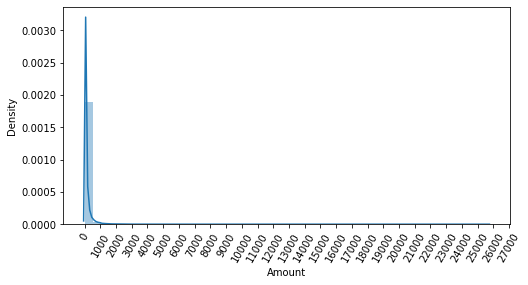

In [6]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [7]:
from sklearn.preprocessing import StandardScaler

def get_scaled_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Amount'], axis=1, inplace=True)
    return df_copy

scaled_amount_card_df = get_scaled_df(card_df)

In [60]:
X_train, X_test, y_train, y_test = \
    get_train_test_dataset(scaled_amount_card_df)

LR = LogisticRegression()
print('LogisticRegression Prediction Result')
get_model_train_eval(LR, X_train, X_test, y_train, y_test)

print('-----------------------------------')
LGBM = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
print('LightGBM Prediction Result')
get_model_train_eval(LGBM, X_train, X_test, y_train, y_test)

LogisticRegression Prediction Result
Confusion Matrix:
[[85281    14]
 [   58    90]]
Accuracy: 0.9992, Precision: 0.8654, Recall: 0.6081, f1_score: 0.7143, AUC: 0.9702
-----------------------------------
LightGBM Prediction Result
Confusion Matrix:
[[85290     5]
 [   37   111]]
Accuracy: 0.9995, Precision: 0.9569, Recall: 0.7500, f1_score: 0.8409, AUC: 0.9779


In [8]:
def get_log_transformed_df(df=None):
    df_copy = df.copy()
    
    amount_n = np.log1p(df_copy['Amount'])

    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Amount'], axis=1, inplace=True)
    return df_copy
log_transformed_df = get_log_transformed_df(card_df)

In [59]:
X_train, X_test, y_train, y_test = \
    get_train_test_dataset(log_transformed_df)

LR = LogisticRegression()
print('LogisticRegression Prediction Result')
get_model_train_eval(LR, X_train, X_test, y_train, y_test)

print('-----------------------------------')
LGBM = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
print('LightGBM Prediction Result')
get_model_train_eval(LGBM, X_train, X_test, y_train, y_test)

LogisticRegression Prediction Result
Confusion Matrix:
[[85283    12]
 [   59    89]]
Accuracy: 0.9992, Precision: 0.8812, Recall: 0.6014, f1_score: 0.7149, AUC: 0.9727
-----------------------------------
LightGBM Prediction Result
Confusion Matrix:
[[85290     5]
 [   35   113]]
Accuracy: 0.9995, Precision: 0.9576, Recall: 0.7635, f1_score: 0.8496, AUC: 0.9796


### Delete Outlier Data

Outlier Data: Specific Data out of entire data pattern  
How can we find Outlier Data?  
- IQR(Inter Quantile Range) method  
IQR = Q3 - Q1  
Max range = Q3 + 1.5*IQR, Min range = Q1 - 1.5*IQR

<AxesSubplot:>

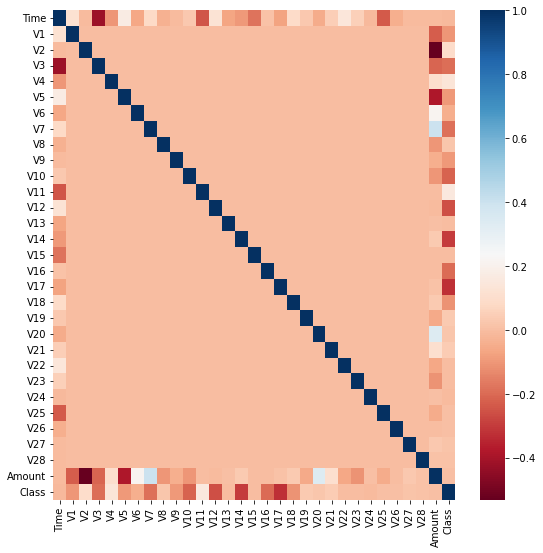

In [61]:
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

By heatmap, we can see the features which have the highest correaltion with label, V14&V17.  
Hence, we're going to check outlier data of V14&V17 using IQR method

In [65]:
card_df[card_df['Class'] == 1]['V14']

541      -4.289254
623      -1.692029
4920     -1.470102
6108     -6.771097
6329     -6.079337
            ...   
279863   -6.665177
280143   -5.210141
280149   -4.057162
281144   -6.416628
281674   -1.948883
Name: V14, Length: 492, dtype: float64

In [9]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]

    Q1 = np.percentile(fraud.values, 25)
    Q3 = np.percentile(fraud.values, 75)
    IQR = Q3 - Q1
    IQR_weight = IQR * weight
    max_range = Q3 + IQR_weight
    min_range = Q1 - IQR_weight

    outlier_index = fraud[(fraud < min_range) | (fraud > max_range)].index
    return outlier_index

outlier_index = get_outlier(card_df, 'V14')
print('Index of [V14] Outlier data:', outlier_index)

Index of [V14] Outlier data: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [10]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()

    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    outlier_index = get_outlier(card_df, 'V14')
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = \
    get_train_test_dataset(card_df)

LR = LogisticRegression()
print('LogisticRegression Prediction Result')
get_model_train_eval(LR, X_train, X_test, y_train, y_test)

print('-----------------------------------')
LGBM = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
print('LightGBM Prediction Result')
get_model_train_eval(LGBM, X_train, X_test, y_train, y_test)

LogisticRegression Prediction Result
Confusion Matrix:
[[85281    14]
 [   48    98]]
Accuracy: 0.9993, Precision: 0.8750, Recall: 0.6712, f1_score: 0.7597, AUC: 0.9743
-----------------------------------
LightGBM Prediction Result
Confusion Matrix:
[[85290     5]
 [   25   121]]
Accuracy: 0.9996, Precision: 0.9603, Recall: 0.8288, f1_score: 0.8897, AUC: 0.9780


### SMOTE Over Sampling

NOTE: When applying SMOTE oversampling, we should apply to TRAINING DATA only.

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('Shape of training dataset featrues:', X_train.shape)
print('Shape of training dataset featrues after applying SMOTE:', X_train_over.shape)

print('Shape of training dataset label:', y_train.shape)
print('Shape of training dataset label after applying SMOTE:', y_train_over.shape)

print('\nDist. of label after applying SMOTE')
y_train_over.value_counts()

Shape of training dataset featrues: (199362, 29)
Shape of training dataset featrues after applying SMOTE: (398040, 29)
Shape of training dataset label: (199362,)
Shape of training dataset label after applying SMOTE: (398040,)

Dist. of label after applying SMOTE


0    199020
1    199020
Name: Class, dtype: int64

In [12]:
LR = LogisticRegression()
get_model_train_eval(LR, X_train_over, X_test, y_train_over, y_test)

Confusion Matrix:
[[82937  2358]
 [   11   135]]
Accuracy: 0.9723, Precision: 0.0542, Recall: 0.9247, f1_score: 0.1023, AUC: 0.9735


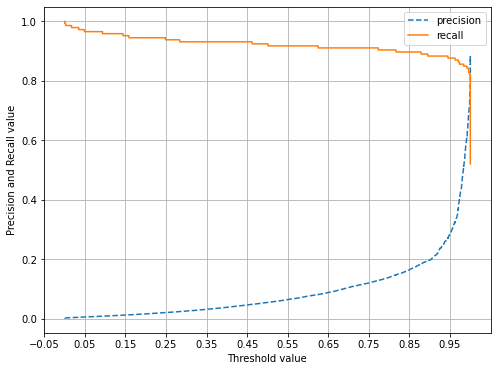

In [13]:
from evaluation import precision_recall_curve_plot

precision_recall_curve_plot(y_test, LR.predict_proba(X_test)[:,1])

In [14]:
LGBM = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(LGBM, X_train_over, X_test, y_train_over, y_test)

Confusion Matrix:
[[85286     9]
 [   24   122]]
Accuracy: 0.9996, Precision: 0.9313, Recall: 0.8356, f1_score: 0.8809, AUC: 0.9798
